# 导入依赖包

In [87]:
%%time
import warnings
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_ks_statistic
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_confusion_matrix
from scikitplot.metrics import plot_silhouette
from scikitplot.metrics import plot_calibration_curve
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from scikitplot.estimators import plot_learning_curve
from scikitplot.estimators import plot_feature_importances
from scikitplot.cluster import plot_elbow_curve
from scikitplot.decomposition import plot_pca_component_variance
from scikitplot.decomposition import plot_pca_2d_projection
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")
pd.set_option('display.width', 10000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.rcParams['font.sans-serif'] = ['STSong']
plt.rcParams['axes.unicode_minus'] = False

CPU times: total: 0 ns
Wall time: 0 ns


# 准备数据

In [2]:
%%time
# 生成二分类数据集
x1, y1 = make_classification(n_samples=5000, n_features=15, n_informative=2, random_state=42)

# 生成多分类数据集
x2, y2 = make_classification(n_samples=5000, n_features=25, n_informative=3, n_redundant=2, n_repeated=0, 
                             n_classes=5, n_clusters_per_class=1, random_state=42)

# 生成聚类数据集
x3, y3 = make_blobs(n_samples=5000, n_features=3, centers=3, cluster_std=1.5, random_state=1)

# 生存回归数据集
x4, y4 = make_regression(n_samples=5000, n_features=20, noise=0.1, random_state=42)

# 切分数据集
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=12)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=12)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=12)
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.3, random_state=12)

CPU times: total: 15.6 ms
Wall time: 22.6 ms


# 混淆矩阵

<Figure size 200x200 with 0 Axes>

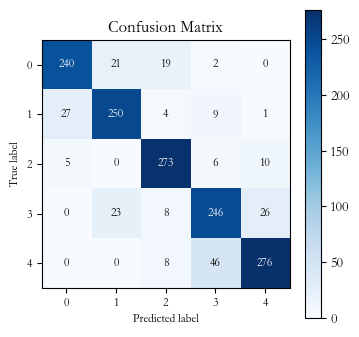

CPU times: total: 2.05 s
Wall time: 2.06 s


In [4]:
%%time
rf = RandomForestClassifier(random_state=12)
rf.fit(x2_train, y2_train)
preds = rf.predict(x2_test)

plt.figure(figsize=(2, 2))
plot_confusion_matrix(y_true=y2_test, y_pred=preds, text_fontsize='small', figsize=(4, 4))
plt.savefig('../figures/confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

# ROC曲线

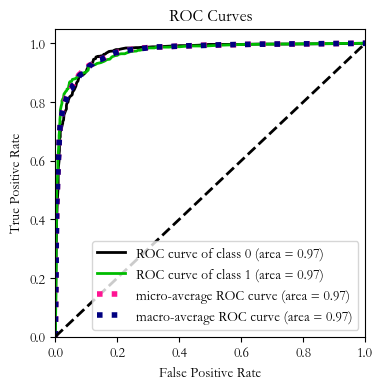

CPU times: total: 1.19 s
Wall time: 1.22 s


In [13]:
%%time
rf = RandomForestClassifier(random_state=12)
rf.fit(x1_train, y1_train)
preds = rf.predict_proba(x1_test)
plot_roc(y1_test, preds, figsize=(4, 4))
plt.savefig('../figures/plot_roc.png', dpi=100, bbox_inches='tight')
plt.show()

# KS曲线

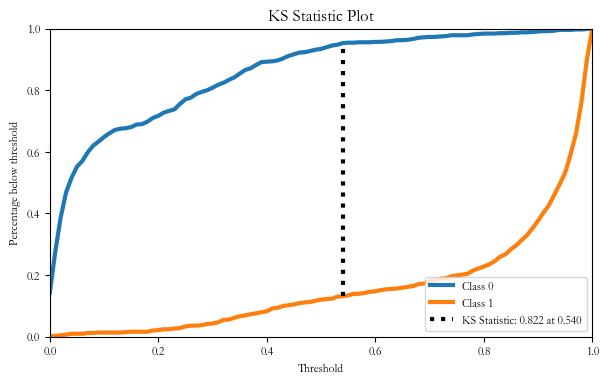

CPU times: total: 1.22 s
Wall time: 1.22 s


In [27]:
%%time
rf = RandomForestClassifier(random_state=12)
rf.fit(x1_train, y1_train)
probas = rf.predict_proba(x1_test)
plot_ks_statistic(y_true=y1_test, y_probas=probas, text_fontsize='small', figsize=(7, 4))
plt.savefig('../figures/ks_statistic.png', dpi=100, bbox_inches='tight')
plt.show()

# PR曲线

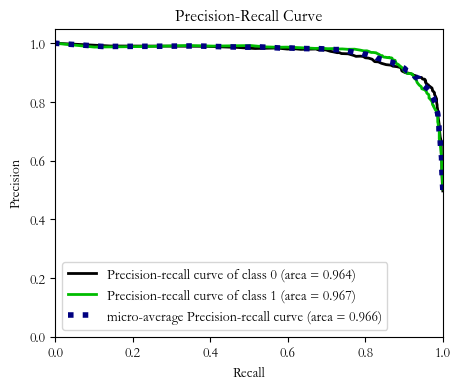

CPU times: total: 1.25 s
Wall time: 1.24 s


In [32]:
%%time
rf = RandomForestClassifier(random_state=12)
rf.fit(x1_train, y1_train)
probas = rf.predict_proba(x1_test)
plot_precision_recall(y_true=y1_test, y_probas=probas, figsize=(5, 4))
plt.savefig('../figures/precision_recall.png', dpi=100, bbox_inches='tight')
plt.show()

# 聚类图

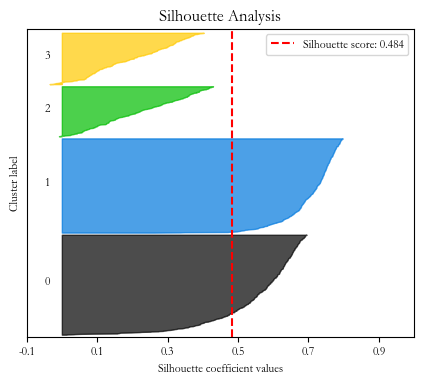

CPU times: total: 2.61 s
Wall time: 469 ms


In [42]:
%%time
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(x3_train)
cluster_labels = kmeans.predict(x3_test)
plot_silhouette(x3_test, cluster_labels, text_fontsize='small', figsize=(5, 4))
plt.savefig('../figures/plot_silhouette.png', dpi=100, bbox_inches='tight')
plt.show()

# 校准曲线

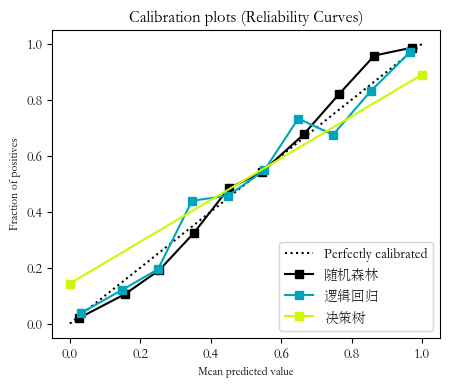

CPU times: total: 1.88 s
Wall time: 1.27 s


In [47]:
%%time
rf_probas = RandomForestClassifier(random_state=12).fit(x1_train, y1_train).predict_proba(x1_test)
lr_probas = LogisticRegression(random_state=12).fit(x1_train, y1_train).predict_proba(x1_test)
dt_probas = DecisionTreeClassifier(random_state=12).fit(x1_train, y1_train).predict_proba(x1_test)

probas_list = [rf_probas, lr_probas, dt_probas]
clf_names=['随机森林', '逻辑回归', '决策树']

plot_calibration_curve(y1_test, probas_list=probas_list, clf_names=clf_names, n_bins=10, text_fontsize='small', figsize=(5, 4))
plt.savefig('../figures/calibration_curve.png', dpi=100, bbox_inches='tight')
plt.show()

# 累计增益图

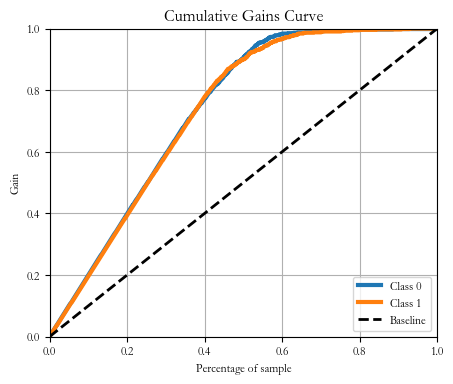

CPU times: total: 1.19 s
Wall time: 1.19 s


In [53]:
%%time
rf = RandomForestClassifier(random_state=12)
rf.fit(x1_train, y1_train)
probas = rf.predict_proba(x1_test)
plot_cumulative_gain(y_true=y1_test, y_probas=probas, text_fontsize='small', figsize=(5, 4))
plt.savefig('../figures/cumulative_gain.png', dpi=100, bbox_inches='tight')
plt.show()

# 提升曲线

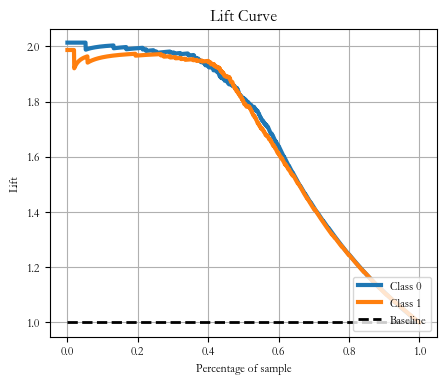

CPU times: total: 1.2 s
Wall time: 1.21 s


In [56]:
%%time
rf = RandomForestClassifier(random_state=12)
rf.fit(x1_train, y1_train)
probas = rf.predict_proba(x1_test)
plot_lift_curve(y_true=y1_test, y_probas=probas, text_fontsize='small', figsize=(5, 4))
plt.savefig('../figures/lift_curve.png', dpi=100, bbox_inches='tight')
plt.show()

# 学习曲线

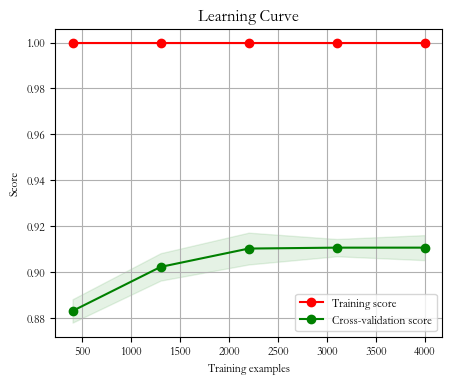

CPU times: total: 15.5 s
Wall time: 15.6 s


In [62]:
%%time
rf = RandomForestClassifier(random_state=12)
plot_learning_curve(rf, x1, y1, text_fontsize='small', figsize=(5, 4))
plt.savefig('../figures/learning_curve.png', dpi=100, bbox_inches='tight')
plt.show()

# 特征重要性

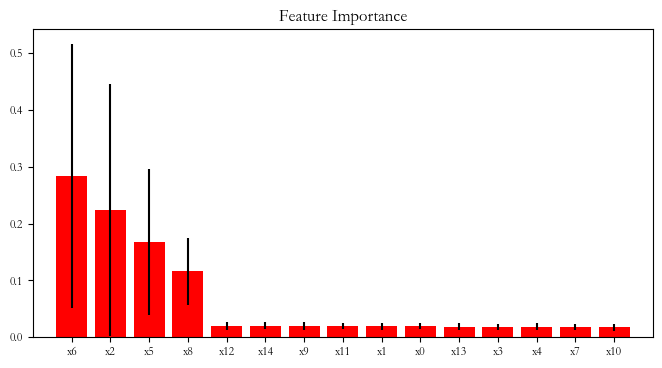

CPU times: total: 1.17 s
Wall time: 1.18 s


In [76]:
%%time
rf = RandomForestClassifier(random_state=12)
rf.fit(x1_train, y1_train)
feature_names=['x{}'.format(i) for i in range(x1_train.shape[1])]
plot_feature_importances(rf, feature_names=feature_names, text_fontsize='small', figsize=(8, 4))
plt.savefig('../figures/feature_importances.png', dpi=100, bbox_inches='tight')
plt.show()

# Elbow曲线

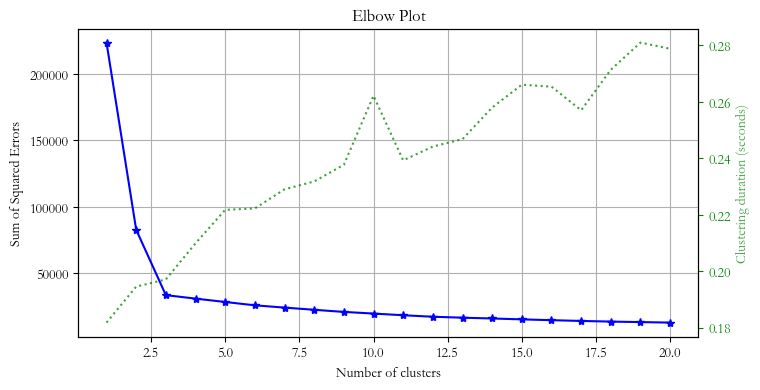

CPU times: total: 36.7 s
Wall time: 5.18 s


In [77]:
%%time
kmeans = KMeans(random_state=12)
plot_elbow_curve(kmeans, x3, cluster_ranges=range(1, 21), figsize=(8, 4))
plt.savefig('../figures/elbow_curve.png', dpi=100, bbox_inches='tight')
plt.show()

# PCA解释性方差

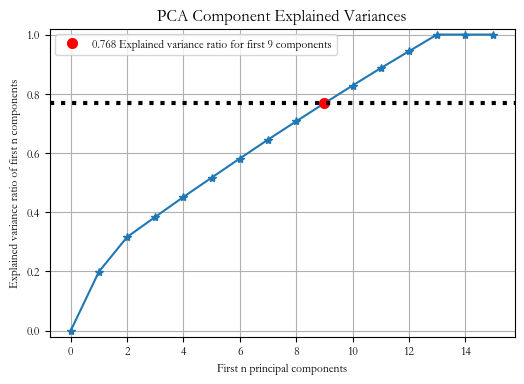

CPU times: total: 938 ms
Wall time: 325 ms


In [86]:
%%time
pca = PCA(random_state=1)
pca.fit(x1_train)
plot_pca_component_variance(pca, text_fontsize='small', figsize=(6, 4))
plt.savefig('../figures/pca_component_variance.png', dpi=100, bbox_inches='tight')
plt.show()

# PCA二维投影

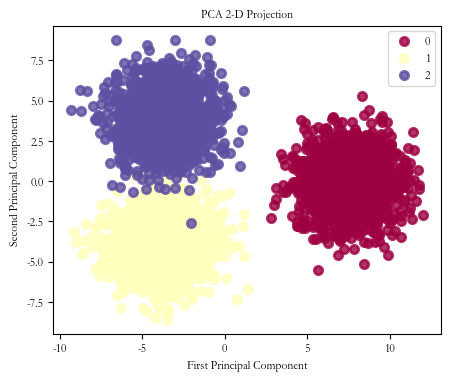

CPU times: total: 1.05 s
Wall time: 419 ms


In [91]:
%%time
pca = PCA(random_state=12)
pca.fit(x3)
plot_pca_2d_projection(pca, x3, y3, text_fontsize='small', title_fontsize='small', figsize=(5, 4))
plt.savefig('../figures/pca_2d_projection.png', dpi=100, bbox_inches='tight')
plt.show()